# 1. Importing Libraries & Data

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
# To use the os.path.join function by defining the path
path = r'/Users/oluwaseunodusanya/Desktop/06.2023_Instacart Basket Analysis'

In [8]:
# Import orders_products_merged_agg Data
df_ords_prods_merged_agg = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

# Creating Charts

## Creating Bar Chart

<Axes: >

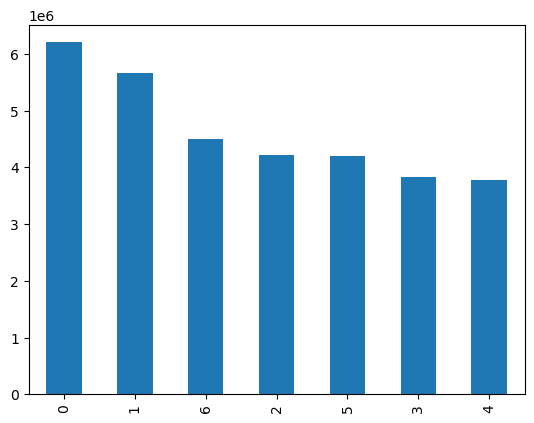

In [ ]:
# tO create a bar chat for “orders_day_of_week” column
df_ords_prods_merged_agg['orders_day_of_week'].value_counts().plot.bar()
plt.title('Orders days of the week')
plt.show()

<Axes: >

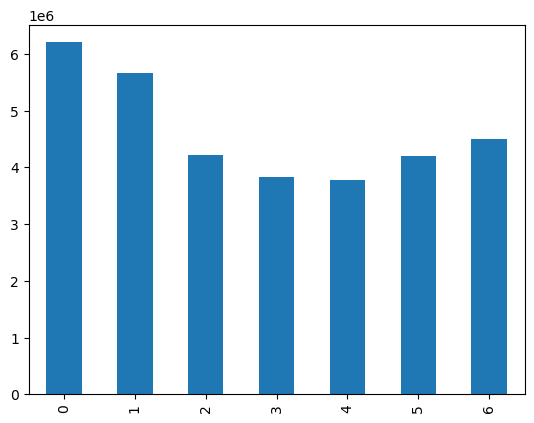

In [10]:
# To sort by index number
df_ords_prods_merged_agg['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [11]:
# To print freguency without chart
df_ords_prods_merged_agg['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [12]:
# To sort frequency by index number
df_ords_prods_merged_agg['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

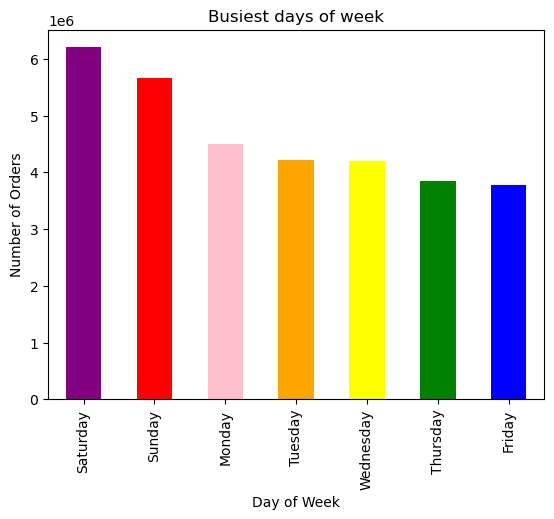

In [41]:
# To add color to the chart
# Custom labels for the days of the week
custom_labels = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

bar = df_ords_prods_merged_agg['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('Busiest days of week')
plt.xlabel('Day of Week')  # Adding the x-axis label
plt.ylabel('Number of Orders')  # Adding the y-axis label

# Setting the custom x-axis labels
plt.xticks(range(len(custom_labels)), [custom_labels[i] for i in range(len(custom_labels))])

plt.show()







In [42]:
# To export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

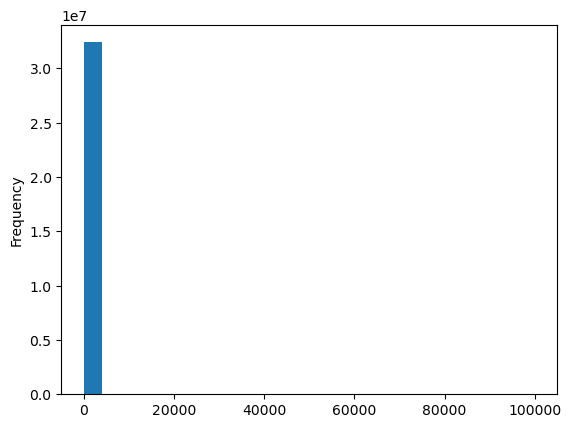

In [27]:
# To create histogram on prices column
df_ords_prods_merged_agg['prices'].plot.hist(bins = 25)

In [28]:
# Data integrity check to understand why we have one bar for the histogram
df_ords_prods_merged_agg['prices'].mean()

11.980225638383454

In [29]:
df_ords_prods_merged_agg['prices'].median()

7.4

In [30]:
# High max value
df_ords_prods_merged_agg['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

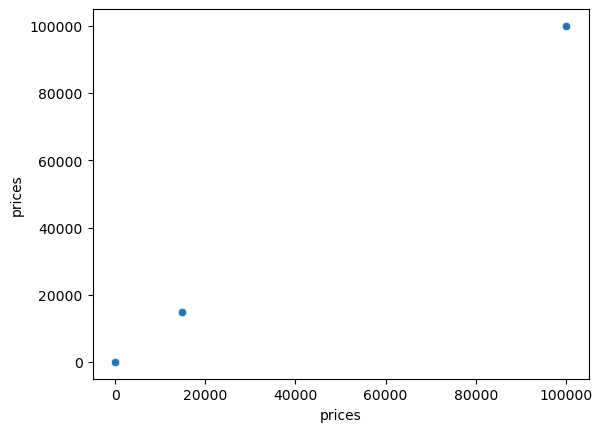

In [31]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merged_agg)

In [32]:
# To identify outliers within our price data
df_ords_prods_merged_agg.loc[df_ords_prods_merged_agg['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [33]:
# To turn the outliers into NaN
df_ords_prods_merged_agg.loc[df_ords_prods_merged_agg['prices'] >100, 'prices'] = np.nan

In [34]:
# Check max value after assigning NaN to values > 100
df_ords_prods_merged_agg['prices'].max()

25.0

<Axes: ylabel='Frequency'>

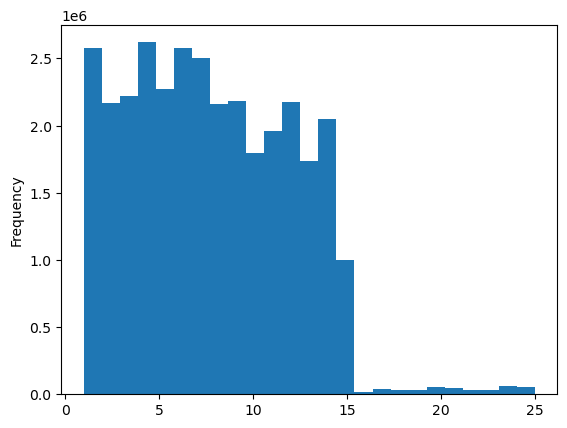

In [35]:
# To create histogram on remaining prices column
df_ords_prods_merged_agg['prices'].plot.hist(bins = 25)


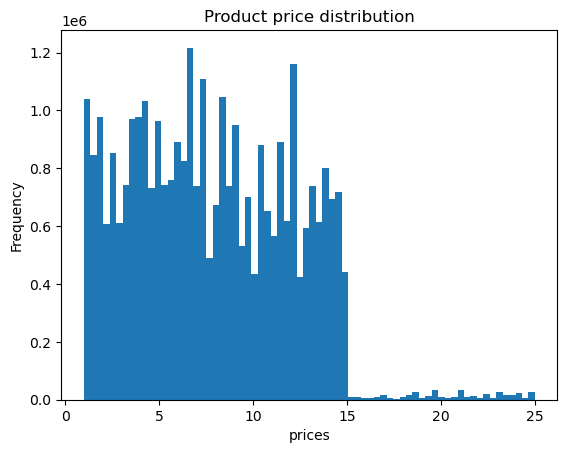

In [39]:
# To increase the granularity of bins
hist = df_ords_prods_merged_agg['prices'].plot.hist(bins = 70)
plt.title('Product price distribution')
plt.xlabel('prices')  # Adding the x-axis label
plt.show()

In [40]:
# To export the histogram chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))


## Creating Line Charts

In [ ]:
# To create line chart of prices over orders_days_of_week 
df = df_ords_prods_merged_agg[:2000000]

In [ ]:
# To create a sample, we need to create list of random floating numbers holding true/false to the test np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged_agg)) <= 0.7

In [ ]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [ ]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merged_agg[dev]

In [ ]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merged_agg[~dev]

In [ ]:
# Add both samples together to check if it matches the size of the original df_ords_prods_merged_agg
len(df_ords_prods_merged_agg)

32404859

In [ ]:
len(big) + len(small)

32404859

In [ ]:
# To create dataframe for the small subset only 
df_2 = small[['orders_day_of_week','prices']]

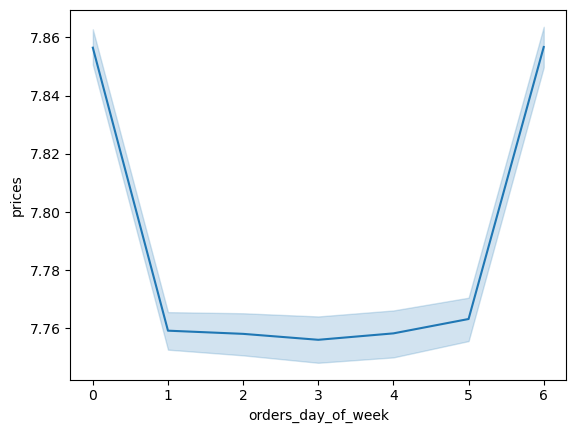

In [ ]:
# To create line chart for the small subset
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [ ]:
# To export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_Orders.dow.png'))